In [52]:
%matplotlib inline  
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
from sim.netrual import Component, NLT_reserve, NLT_components  # noqa
from sim.data import get_batch_price, get_price, read_csv
import pandas as pd


## Prepare market Data

In [54]:
target = ['EOS', 'OMG', 'ELF', 'INS', 'MANA', 'IOST', 'ARK']
market_prices = get_batch_price(target)
m = market_prices
m.dropna(how='any')[2000:]
get_price('OMG')[2000:]

pd.to_datetime(m['timestamp'], unit='s')

0      2018-02-04 16:30:00
1      2018-02-04 16:35:00
2      2018-02-04 16:40:00
3      2018-02-04 16:45:00
4      2018-02-04 16:50:00
5      2018-02-04 16:55:00
6      2018-02-04 17:00:00
7      2018-02-04 17:05:00
8      2018-02-04 17:10:00
9      2018-02-04 17:15:00
10     2018-02-04 17:20:00
11     2018-02-04 17:25:00
12     2018-02-04 17:30:00
13     2018-02-04 17:35:00
14     2018-02-04 17:40:00
15     2018-02-04 17:45:00
16     2018-02-04 17:50:00
17     2018-02-04 17:55:00
18     2018-02-04 18:00:00
19     2018-02-04 18:05:00
20     2018-02-04 18:10:00
21     2018-02-04 18:15:00
22     2018-02-04 18:20:00
23     2018-02-04 18:25:00
24     2018-02-04 18:30:00
25     2018-02-04 18:35:00
26     2018-02-04 18:40:00
27     2018-02-04 18:45:00
28     2018-02-04 18:50:00
29     2018-02-04 18:55:00
               ...        
4641   2018-02-19 17:15:00
4642   2018-02-19 17:20:00
4643   2018-02-19 17:25:00
4644   2018-02-19 17:30:00
4645   2018-02-19 17:35:00
4646   2018-02-19 17:40:00
4

In [55]:
read_csv('ETH_USDT')['last'][1100:1500]

1100    781.66
1101    781.66
1102    781.66
1103    781.66
1104    781.66
1105    781.66
1106    781.66
1107    781.66
1108    781.66
1109    781.66
1110    781.66
1111    781.66
1112    781.66
1113    781.66
1114    781.66
1115    781.66
1116    781.66
1117    781.66
1118    781.66
1119    781.66
1120    781.66
1121    781.66
1122    781.66
1123    781.66
1124    781.66
1125    781.66
1126    781.66
1127    781.66
1128    781.66
1129    781.66
         ...  
1470    837.98
1471    838.00
1472    837.99
1473    837.94
1474    832.10
1475    832.99
1476    835.07
1477    835.10
1478    834.07
1479    834.75
1480    835.25
1481    835.20
1482    832.03
1483    833.00
1484    826.61
1485    827.01
1486    825.07
1487    825.41
1488    831.96
1489    831.73
1490    828.11
1491    827.84
1492    830.05
1493    830.49
1494    826.90
1495    828.43
1496    827.57
1497    827.55
1498    828.00
1499    827.66
Name: last, Length: 400, dtype: float64

In [56]:
read_csv('ETH_USDT')[2000:]

,ETH_USDT,open,high,low,last,type,timestamp
2000,ETH/USDT,866.11,866.37,866.00,866.29,5m,1518266400
2001,ETH/USDT,870.16,870.67,869.60,869.70,5m,1518266700
2002,ETH/USDT,868.22,868.98,868.22,868.94,5m,1518267000
2003,ETH/USDT,865.71,866.00,865.46,866.00,5m,1518267300
2004,ETH/USDT,866.62,866.68,866.26,866.26,5m,1518267600
2005,ETH/USDT,871.98,871.99,871.55,871.57,5m,1518267900
2006,ETH/USDT,876.00,876.00,875.20,875.85,5m,1518268200
2007,ETH/USDT,878.13,878.20,877.99,878.20,5m,1518268500
2008,ETH/USDT,875.26,876.16,875.13,875.13,5m,1518268800
2009,ETH/USDT,876.21,877.22,876.17,876.50,5m,1518269100


## Define

### Price I:

\begin{gather*}
\frac{Highest(Price_{cmponents}) \times min_{bid}(Highest(Price_{cmponents}))}{1000} \ for\ each\ components
\end{gather*}

### Price II:

\begin{gather*}
\frac{\sum{component_{highest\ bid}\times component_{price}}}{NLT_{amount\ per\ round}}
\end{gather*}

### Auction:

\begin{gather*}
Auction(\frac{price_{NLT}}{price_{Component}}\times 1000) \iff Price_{NLT} > \frac{Price_{Token} \times NLT_{min bid}}{1000}
\end{gather*}

### Redeem:

\begin{gather*}
Redeem \iff Price_{NLT}<\frac{Price_{Token} \times NLT_{min bid}}{1000}
\end{gather*}

## Simulation

In [57]:
from sim.utils import redeem_strategy, auction_strategy
from sim.simulator import sim_loop
from sim.netrual import NLT_accounts
import random

# NLT_accounts['satoshi'] = 10000000000000

In [58]:
res = sim_loop(m)

True
True
True
True
True
True
True
EOS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1175000.0}
OMG:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1176000.0}
ELF:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1177000.0}
INS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1178000.0}
MANA:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1179000.0}
IOST:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1180000.0}
ARK:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1181000.0}
PRICE OF NLT 15.000000000000002
plan to redeem {'EOS': 2000, 'OMG': 2000, 'ELF': 2000, 'MANA': 2000, 'IOST': 2000, 'ARK': 2000} for
Redeeming Current accounts {'satoshi': 1181000.0}, redeem 2000.0 for satoshi
Redeeming Current accounts {'satoshi': 1179000.0}, red

plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.577354517486697
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.52981099105836
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.169190070129353
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.190328493193782
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.060726321254915
plan to redeem {} for
Redeemed {}
PRICE OF NLT 17.78763144453679
plan to redeem {} for
Redeemed {}
EOS:: New cycle 23
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 40000.0}
OMG:: New cycle 23
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 41000.0}
ELF:: New cycle 23
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 42000.0}
INS:: New cycle 23
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 43000.0}
MANA:: New cycle 23
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 44000.0}
IOST:: New cycle 23
Found last Winner
sent 1000 NTL to satoshi
Current balan

PRICE OF NLT 21.575090331410035
plan to redeem {} for
Redeemed {}
PRICE OF NLT 21.46613885759972
plan to redeem {} for
Redeemed {}
PRICE OF NLT 21.663473059436477
plan to redeem {} for
Redeemed {}
PRICE OF NLT 21.832917730399615
plan to redeem {} for
Redeemed {}
PRICE OF NLT 21.652707661867833
plan to redeem {} for
Redeemed {}
PRICE OF NLT 21.54934665649126
plan to redeem {} for
Redeemed {}
PRICE OF NLT 21.87350095542817
plan to redeem {} for
Redeemed {}
PRICE OF NLT 22.00961485302101
plan to redeem {} for
Redeemed {}
PRICE OF NLT 21.970282217523497
plan to redeem {} for
Redeemed {}
EOS:: New cycle 41
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 147000.0}
OMG:: New cycle 41
ELF:: New cycle 41
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 148000.0}
INS:: New cycle 41
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 149000.0}
MANA:: New cycle 41
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 

MANA:: New cycle 60
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 264000.0}
IOST:: New cycle 60
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 265000.0}
ARK:: New cycle 60
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 266000.0}
PRICE OF NLT 44.511516730425186
plan to redeem {} for
Redeemed {}
plan to auction {'EOS': 5700.558718377385, 'OMG': 4339.487482111758, 'ELF': 38707.01305299767, 'MANA': 551841.2686638382, 'IOST': 1398853.4484734503, 'ARK': 12926.704808417917}
Auctioned {'auctioned': True}
PRICE OF NLT 44.21738377804691
plan to redeem {} for
Redeemed {}
PRICE OF NLT 43.96758909018678
plan to redeem {} for
Redeemed {}
PRICE OF NLT 43.96225288252594
plan to redeem {} for
Redeemed {}
PRICE OF NLT 43.55652753866916
plan to redeem {} for
Redeemed {}
PRICE OF NLT 43.503942454819146
plan to redeem {} for
Redeemed {}
PRICE OF NLT 43.473288809569624
plan to redeem {} for
Redeemed {}
PRICE OF NLT 43.34377846243504
pl

MANA:: New cycle 80
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 384000.0}
IOST:: New cycle 80
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 385000.0}
ARK:: New cycle 80
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 386000.0}
PRICE OF NLT 83.41220473796507
plan to redeem {} for
Redeemed {}
plan to auction {'OMG': 7669.737276187476, 'ELF': 70137.74503865934, 'INS': 39352.28480561923, 'MANA': 847587.6727364141, 'IOST': 2504236.3058121325, 'ARK': 23677.007918989097}
Auctioned {'auctioned': True}
PRICE OF NLT 83.85026681922206
plan to redeem {} for
Redeemed {}
PRICE OF NLT 83.1361010298444
plan to redeem {} for
Redeemed {}
PRICE OF NLT 83.38222630911571
plan to redeem {} for
Redeemed {}
PRICE OF NLT 84.23627063941537
plan to redeem {} for
Redeemed {}
PRICE OF NLT 84.04615126631522
plan to redeem {} for
Redeemed {}
PRICE OF NLT 84.14978990053187
plan to redeem {} for
Redeemed {}
PRICE OF NLT 85.583515683165
plan to 

plan to redeem {} for
Redeemed {}
PRICE OF NLT 138.47396120132126
plan to redeem {} for
Redeemed {}
PRICE OF NLT 138.39619946743883
plan to redeem {} for
Redeemed {}
PRICE OF NLT 138.77104491690199
plan to redeem {} for
Redeemed {}
PRICE OF NLT 137.8143741393591
plan to redeem {} for
Redeemed {}
PRICE OF NLT 137.58333765433875
plan to redeem {} for
Redeemed {}
PRICE OF NLT 137.26281261894528
plan to redeem {} for
Redeemed {}
PRICE OF NLT 136.5298449811983
plan to redeem {} for
Redeemed {}
EOS:: New cycle 99
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 492000.0}
OMG:: New cycle 99
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 493000.0}
ELF:: New cycle 99
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 494000.0}
INS:: New cycle 99
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 495000.0}
MANA:: New cycle 99
IOST:: New cycle 99
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satos

sent 1000 NTL to satoshi
Current balance {'satoshi': 536000.0}
INS:: New cycle 107
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 537000.0}
MANA:: New cycle 107
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 538000.0}
IOST:: New cycle 107
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 539000.0}
ARK:: New cycle 107
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 540000.0}
PRICE OF NLT 152.64530938541816
plan to redeem {} for
Redeemed {}
plan to auction {'EOS': 19089.297285106895, 'OMG': 13601.971945855228, 'INS': 76437.6218444085, 'MANA': 1459948.2186450646, 'IOST': 4502709.212369458, 'ARK': 43115.88126816156}
Auctioned {'auctioned': True}
PRICE OF NLT 153.82721760848057
plan to redeem {} for
Redeemed {}
PRICE OF NLT 154.32649522797237
plan to redeem {} for
Redeemed {}
PRICE OF NLT 153.65028849551595
plan to redeem {} for
Redeemed {}
PRICE OF NLT 154.00215188246275
plan to redeem {} for
Redeem

PRICE OF NLT 197.6815561612121
plan to redeem {} for
Redeemed {}
PRICE OF NLT 198.24509102857394
plan to redeem {} for
Redeemed {}
EOS:: New cycle 116
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 588000.0}
OMG:: New cycle 116
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 589000.0}
ELF:: New cycle 116
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 590000.0}
INS:: New cycle 116
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 591000.0}
MANA:: New cycle 116
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 592000.0}
IOST:: New cycle 116
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 593000.0}
ARK:: New cycle 116
PRICE OF NLT 201.32254388948306
plan to redeem {} for
Redeemed {}
plan to auction {'ELF': 173898.65624084006, 'INS': 95136.77458156466, 'MANA': 1682124.469032766, 'IOST': 5556852.515332299, 'ARK': 52426.92663382423}
Auctioned {'auctioned': T

Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 613000.0}
INS:: New cycle 120
MANA:: New cycle 120
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 614000.0}
IOST:: New cycle 120
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 615000.0}
ARK:: New cycle 120
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 616000.0}
PRICE OF NLT 235.34628056229266
plan to redeem {} for
Redeemed {}
plan to auction {'EOS': 29431.59624547851, 'OMG': 20971.31918863587, 'ELF': 192797.1521393643, 'MANA': 1900458.649349644, 'IOST': 6032408.671382776, 'ARK': 57022.3896972069}
Auctioned {'auctioned': True}
PRICE OF NLT 232.7336832854824
plan to redeem {} for
Redeemed {}
PRICE OF NLT 232.72550061501042
plan to redeem {} for
Redeemed {}
PRICE OF NLT 231.71511108131944
plan to redeem {} for
Redeemed {}
PRICE OF NLT 229.86111060025658
plan to redeem {} for
Redeemed {}
PRICE OF NLT 229.22790033765128
plan to redeem {} for
Redeeme

plan to redeem {} for
Redeemed {}
PRICE OF NLT 295.4619396747903
plan to redeem {} for
Redeemed {}
PRICE OF NLT 295.4619396747903
plan to redeem {} for
Redeemed {}
PRICE OF NLT 295.4619396747903
plan to redeem {} for
Redeemed {}
PRICE OF NLT 295.4619396747903
plan to redeem {} for
Redeemed {}
EOS:: New cycle 129
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 665000.0}
OMG:: New cycle 129
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 666000.0}
ELF:: New cycle 129
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 667000.0}
INS:: New cycle 129
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 668000.0}
MANA:: New cycle 129
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 669000.0}
IOST:: New cycle 129
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 670000.0}
ARK:: New cycle 129
PRICE OF NLT 298.06723370725877
plan to redeem {} for
Redeemed {}
plan to auct

sent 1000 NTL to satoshi
Current balance {'satoshi': 710000.0}
OMG:: New cycle 137
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 711000.0}
ELF:: New cycle 137
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 712000.0}
INS:: New cycle 137
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 713000.0}
MANA:: New cycle 137
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 714000.0}
IOST:: New cycle 137
ARK:: New cycle 137
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 715000.0}
PRICE OF NLT 357.5465149199285
plan to redeem {} for
Redeemed {}
plan to auction {'EOS': 44713.537180019164, 'OMG': 31860.380675043256, 'ELF': 311280.96243660006, 'INS': 155070.78692394317, 'MANA': 3089285.7197654736, 'ARK': 91039.15554966747}
Auctioned {'auctioned': True}
PRICE OF NLT 365.3144351863032
plan to redeem {} for
Redeemed {}
PRICE OF NLT 356.7839388181513
plan to redeem {} for
Redeemed {}
PRICE 

Auctioned {'auctioned': True}
PRICE OF NLT 429.7257645368666
plan to redeem {} for
Redeemed {}
PRICE OF NLT 429.2706461335905
plan to redeem {} for
Redeemed {}
PRICE OF NLT 431.2279579910864
plan to redeem {} for
Redeemed {}
PRICE OF NLT 430.77124862924387
plan to redeem {} for
Redeemed {}
PRICE OF NLT 430.8372885243161
plan to redeem {} for
Redeemed {}
PRICE OF NLT 431.8385895580129
plan to redeem {} for
Redeemed {}
PRICE OF NLT 432.95138168618433
plan to redeem {} for
Redeemed {}
PRICE OF NLT 435.1665248278854
plan to redeem {} for
Redeemed {}
PRICE OF NLT 432.69469481019723
plan to redeem {} for
Redeemed {}
PRICE OF NLT 435.3873334211015
plan to redeem {} for
Redeemed {}
PRICE OF NLT 436.1094467803809
plan to redeem {} for
Redeemed {}
EOS:: New cycle 151
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 793000.0}
OMG:: New cycle 151
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 794000.0}
ELF:: New cycle 151
Found last Winner
sent 1000 NT

plan to redeem {} for
Redeemed {}
PRICE OF NLT 691.5748865456517
plan to redeem {} for
Redeemed {}
PRICE OF NLT 711.3091553917567
plan to redeem {} for
Redeemed {}
PRICE OF NLT 708.293084370861
plan to redeem {} for
Redeemed {}
PRICE OF NLT 708.7895507816139
plan to redeem {} for
Redeemed {}
EOS:: New cycle 171
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 912000.0}
OMG:: New cycle 171
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 913000.0}
ELF:: New cycle 171
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 914000.0}
INS:: New cycle 171
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 915000.0}
MANA:: New cycle 171
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 916000.0}
IOST:: New cycle 171
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 917000.0}
ARK:: New cycle 171
PRICE OF NLT 737.529914882602
plan to redeem {} for
Redeemed {}
plan to auction

ELF:: New cycle 184
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 991000.0}
INS:: New cycle 184
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 992000.0}
MANA:: New cycle 184
IOST:: New cycle 184
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 993000.0}
ARK:: New cycle 184
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 994000.0}
PRICE OF NLT 1020.3516793947622
plan to redeem {} for
Redeemed {}
plan to auction {'EOS': 127601.67097008327, 'OMG': 90921.85651765353, 'ELF': 713586.4363724497, 'MANA': 7110756.032336113, 'IOST': 24845782.28460439, 'ARK': 213372.38390298514}
Auctioned {'auctioned': True}
PRICE OF NLT 1014.3566054058281
plan to redeem {} for
Redeemed {}
PRICE OF NLT 1015.8818039457559
plan to redeem {} for
Redeemed {}
PRICE OF NLT 1010.5259235255812
plan to redeem {} for
Redeemed {}
PRICE OF NLT 999.9062036396172
plan to redeem {} for
Redeemed {}
PRICE OF NLT 1012.6911176991405
plan t

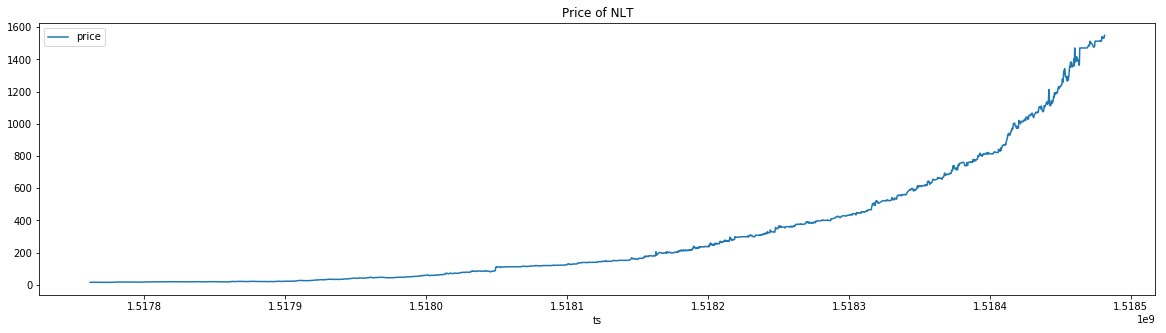

In [59]:
res = pd.DataFrame(res)
res.plot(y='price', x='ts', title="Price of NLT", figsize=(20, 5))

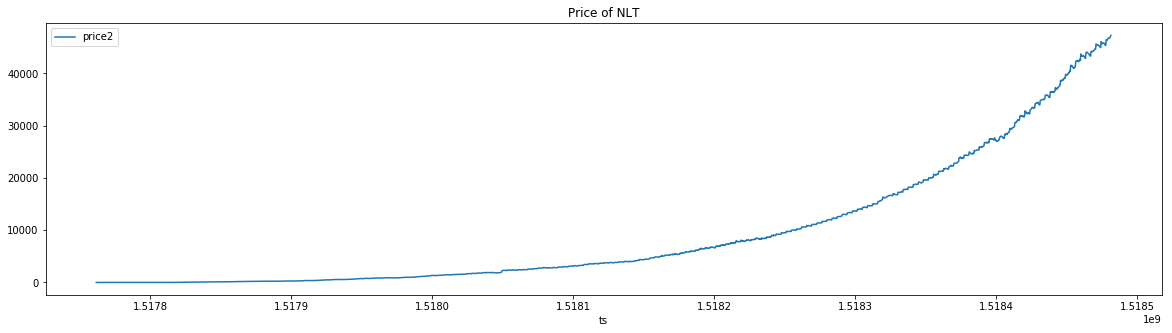

In [60]:
res = pd.DataFrame(res)
res.plot(y='price2', x='ts', title="Price of NLT", figsize=(20, 5))

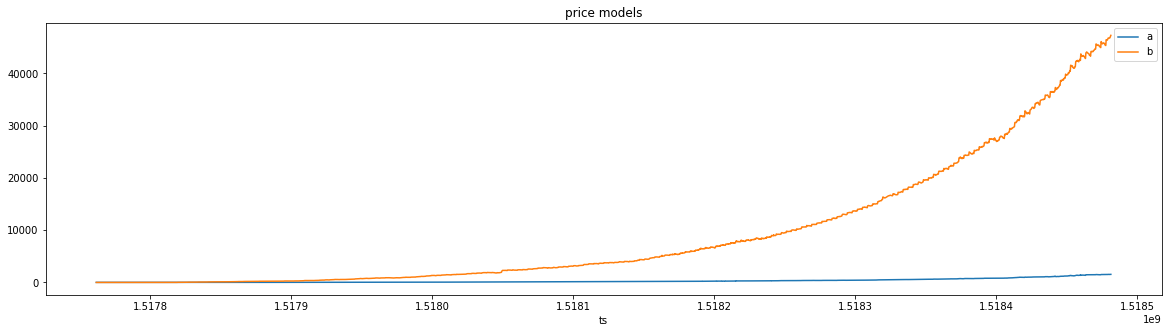

In [61]:
pd.DataFrame(
    {
        'a': res['price'],
        'b': res['price2'],
        'ts': res['ts']
    }
).plot(x='ts', figsize=(20, 5), title="price models")
        


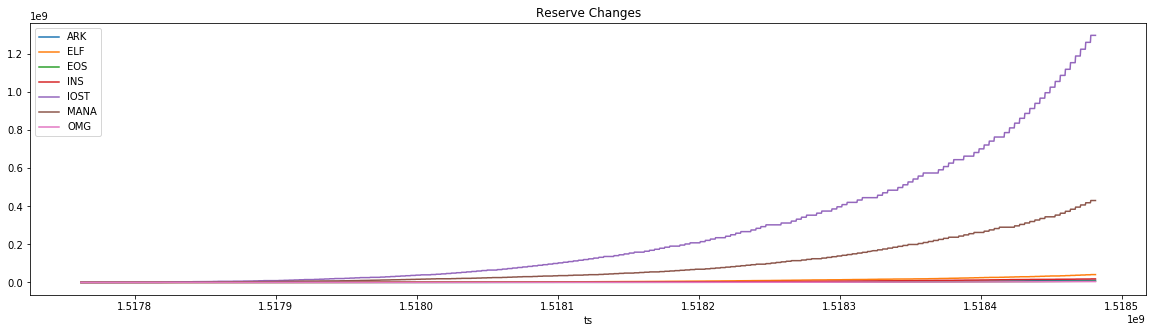

In [62]:
res.drop(columns=['price', 'price2']).plot(title='Reserve Changes', x='ts', figsize=(20, 5))

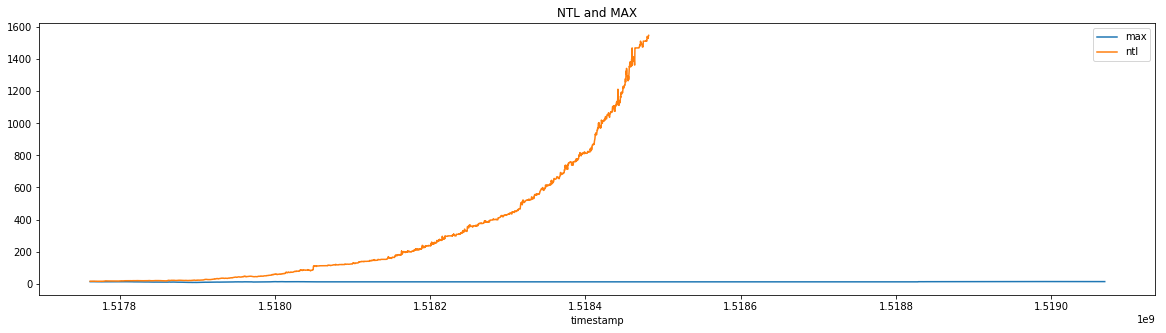

In [63]:
pd.DataFrame({
    'max': m.drop(columns=['timestamp']).T.max(),
    'timestamp': m.timestamp,
    'ntl': res.price
}).plot(x='timestamp', title="NTL and MAX", figsize=(20, 5))

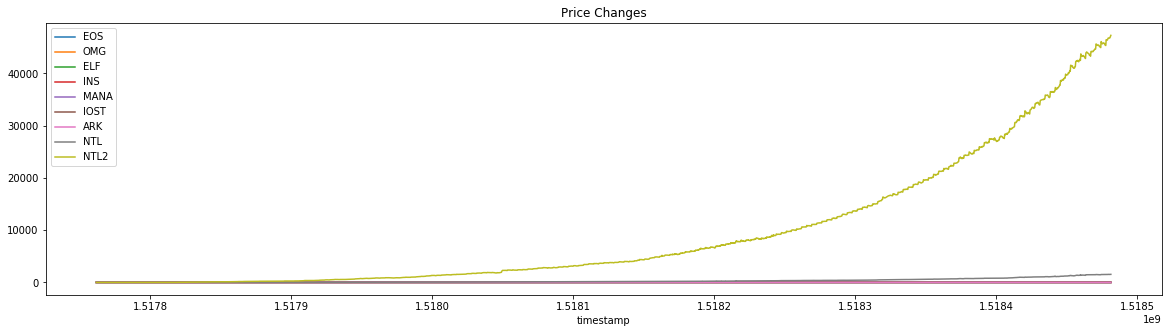

In [64]:
pd.merge(m,
         pd.DataFrame(dict(NTL=res['price'], NTL2=res['price2'], timestamp=res['ts'])),
         on='timestamp').plot(x='timestamp', title="Price Changes", figsize=(20, 5))

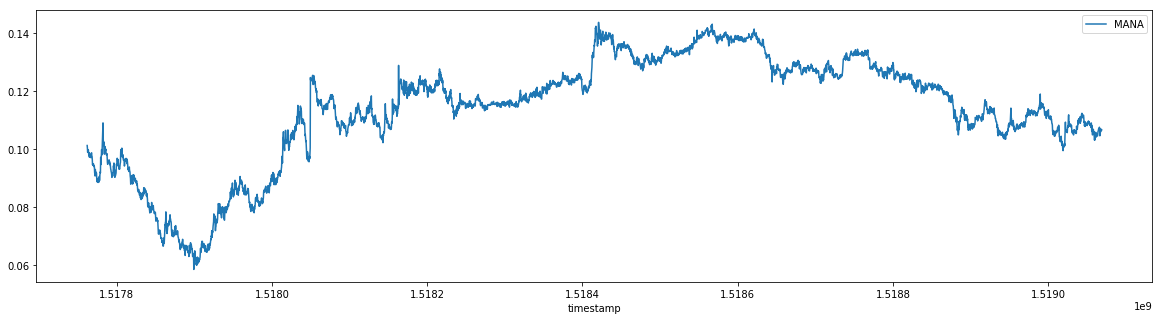

In [65]:
m.plot(y='MANA', x='timestamp', figsize=(20, 5))

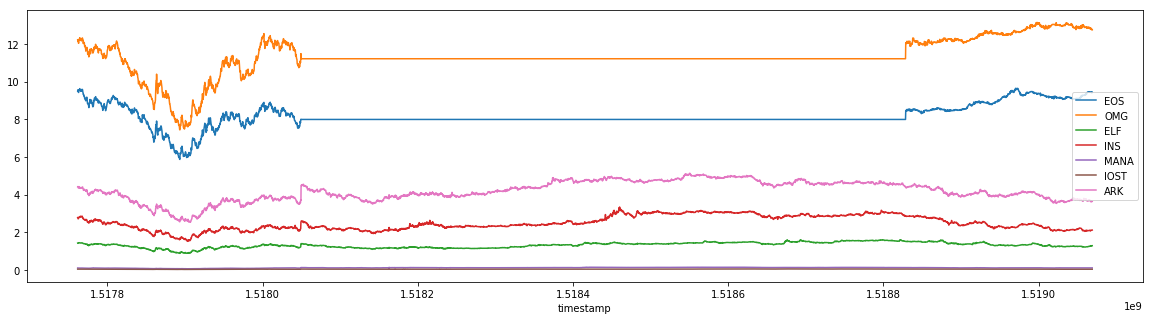

In [66]:
m.plot(x='timestamp', figsize=(20, 5))

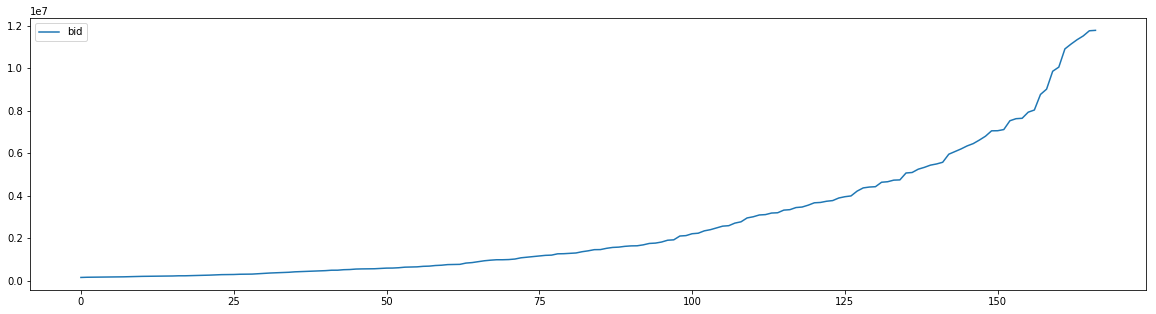

In [67]:
pd.DataFrame([v for v in NLT_components['MANA'].minted.values()]).plot(figsize=(20, 5))

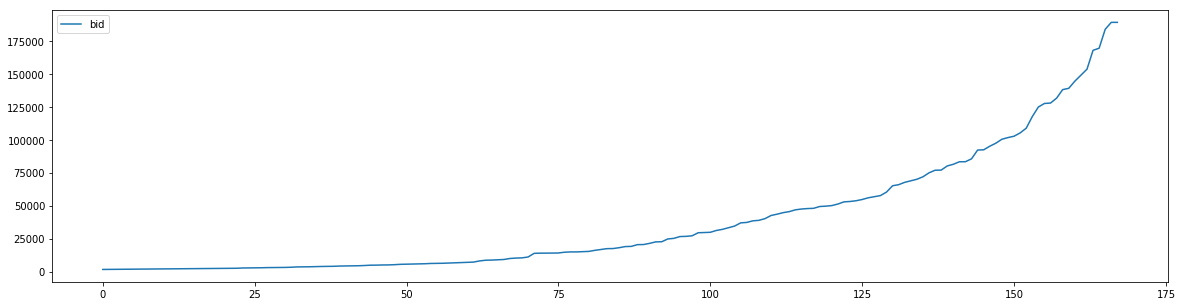

In [68]:
pd.DataFrame([v for v in NLT_components['EOS'].minted.values()]).plot(figsize=(20, 5))

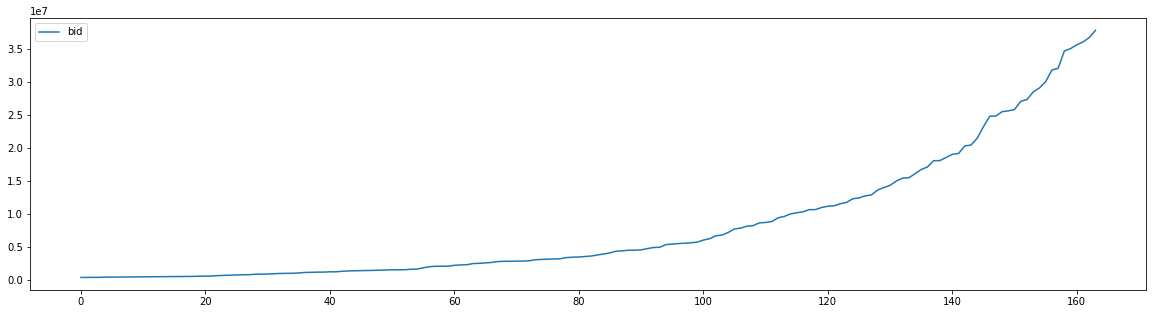

In [69]:
pd.DataFrame([v for v in NLT_components['IOST'].minted.values()]).plot(figsize=(20, 5))